# Model Prediksi Risiko Penyakit Diabetes
## Klinik Sehat Sentosa

**Tujuan Proyek:** Mengembangkan model machine learning untuk memprediksi risiko diabetes pada pasien berdasarkan data rekam medis untuk program pencegahan dini.

**Dataset:** Data rekam medis pasien selama 1 tahun terakhir dari Klinik Sehat Sentosa

**Lingkup Kerja:**
1. Menentukan tujuan teknis data science
2. Membuat rencana proyek data science
3. Membangun model
4. Mengevaluasi hasil pemodelan
5. Melakukan deployment model
6. Melakukan pemeliharaan model
7. Menerapkan program kerja pelindungan data pribadi
8. Melakukan laporan akhir proyek data science

## 1. Setup dan Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import joblib

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Library berhasil diimport")
print(f"Waktu eksekusi: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Library berhasil diimport
Waktu eksekusi: 2025-10-15 19:21:06


## 2. Tujuan Teknis Data Science

**Tujuan Bisnis:** Mengidentifikasi pasien yang berisiko tinggi terkena diabetes untuk program pencegahan dini di Klinik Sehat Sentosa.

**Tujuan Teknis:**
1. Membangun model klasifikasi biner untuk memprediksi risiko diabetes (0: tidak diabetes, 1: diabetes)
2. Mencapai akurasi model minimal 80% dengan recall tinggi untuk mendeteksi kasus positif
3. Mengidentifikasi faktor-faktor penting yang berkontribusi terhadap risiko diabetes
4. Membuat sistem scoring risiko yang mudah diinterpretasi oleh tenaga medis

**Metrik Evaluasi:**
- Akurasi, Precision, Recall, F1-Score
- ROC-AUC Score
- Confusion Matrix
- Feature Importance

## 3. Load dan Eksplorasi Dataset

In [2]:
# Load dataset
df = pd.read_csv('diabetes.csv')

print("=== INFORMASI DATASET ===")
print(f"Ukuran dataset: {df.shape}")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\n=== INFO DATASET ===")
df.info()

=== INFORMASI DATASET ===
Ukuran dataset: (768, 9)
Jumlah baris: 768
Jumlah kolom: 9

=== INFO DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
# Tampilkan 5 baris pertama
print("=== 5 BARIS PERTAMA ===")
display(df.head())

print("\n=== 5 BARIS TERAKHIR ===")
display(df.tail())

=== 5 BARIS PERTAMA ===


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



=== 5 BARIS TERAKHIR ===


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
# Statistik deskriptif
print("=== STATISTIK DESKRIPTIF ===")
display(df.describe())

=== STATISTIK DESKRIPTIF ===


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Cek missing values
print("=== MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

# Cek nilai 0 yang mungkin merupakan missing values
print("\n=== NILAI 0 PADA SETIAP KOLOM ===")
zero_values = (df == 0).sum()
print(zero_values)

=== MISSING VALUES ===
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Total missing values: 0

=== NILAI 0 PADA SETIAP KOLOM ===
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


=== DISTRIBUSI TARGET VARIABLE ===
Outcome
0    500
1    268
Name: count, dtype: int64

Persentase:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


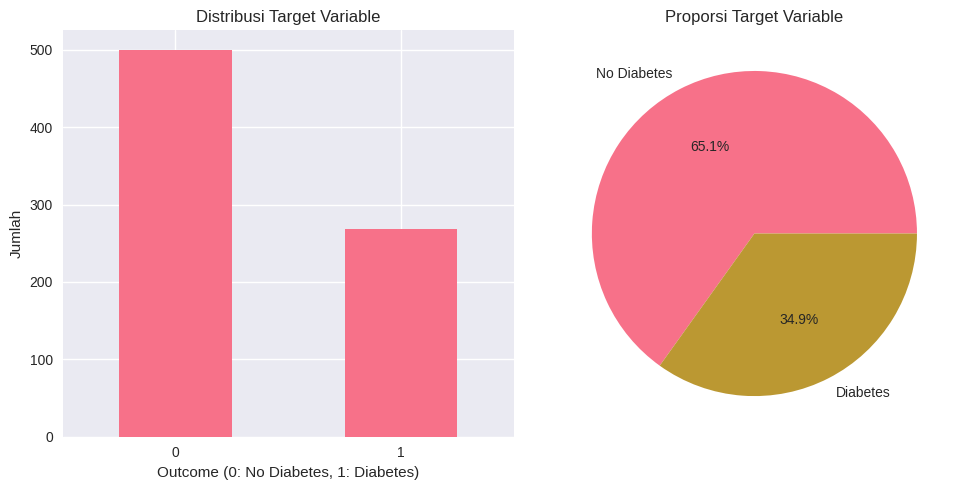

In [6]:
# Distribusi target variable
print("=== DISTRIBUSI TARGET VARIABLE ===")
outcome_counts = df['Outcome'].value_counts()
print(outcome_counts)
print(f"\nPersentase:")
print(df['Outcome'].value_counts(normalize=True) * 100)

# Visualisasi distribusi target
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['Outcome'].value_counts().plot(kind='bar')
plt.title('Distribusi Target Variable')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(outcome_counts.values, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%')
plt.title('Proporsi Target Variable')

plt.tight_layout()
plt.show()

## 4. Data Cleaning dan Preprocessing

In [7]:
# Buat copy dataset untuk preprocessing
df_clean = df.copy()

# Identifikasi kolom yang tidak boleh memiliki nilai 0
# Berdasarkan domain knowledge, kolom berikut tidak mungkin bernilai 0:
zero_not_acceptable = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("=== ANALISIS NILAI 0 YANG TIDAK NORMAL ===")
for col in zero_not_acceptable:
    zero_count = (df_clean[col] == 0).sum()
    zero_percent = (zero_count / len(df_clean)) * 100
    print(f"{col}: {zero_count} nilai 0 ({zero_percent:.2f}%)")

=== ANALISIS NILAI 0 YANG TIDAK NORMAL ===
Glucose: 5 nilai 0 (0.65%)
BloodPressure: 35 nilai 0 (4.56%)
SkinThickness: 227 nilai 0 (29.56%)
Insulin: 374 nilai 0 (48.70%)
BMI: 11 nilai 0 (1.43%)


In [8]:
# Ganti nilai 0 dengan NaN pada kolom yang tidak boleh 0
df_clean[zero_not_acceptable] = df_clean[zero_not_acceptable].replace(0, np.nan)

print("=== MISSING VALUES SETELAH REPLACEMENT ===")
missing_after = df_clean.isnull().sum()
print(missing_after)
print(f"\nTotal missing values: {missing_after.sum()}")

=== MISSING VALUES SETELAH REPLACEMENT ===
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Total missing values: 652


In [9]:
# Imputasi missing values dengan median (robust terhadap outliers)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df_clean[zero_not_acceptable] = imputer.fit_transform(df_clean[zero_not_acceptable])

print("=== MISSING VALUES SETELAH IMPUTASI ===")
print(df_clean.isnull().sum())
print(f"\nTotal missing values: {df_clean.isnull().sum().sum()}")

=== MISSING VALUES SETELAH IMPUTASI ===
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Total missing values: 0


In [10]:
# Deteksi outliers menggunakan IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("=== DETEKSI OUTLIERS ===")
for col in df_clean.select_dtypes(include=[np.number]).columns:
    if col != 'Outcome':
        outliers, lower, upper = detect_outliers_iqr(df_clean, col)
        print(f"{col}: {len(outliers)} outliers (bounds: {lower:.2f} - {upper:.2f})")

=== DETEKSI OUTLIERS ===
Pregnancies: 4 outliers (bounds: -6.50 - 13.50)
Glucose: 0 outliers (bounds: 39.00 - 201.00)
BloodPressure: 14 outliers (bounds: 40.00 - 104.00)
SkinThickness: 87 outliers (bounds: 14.50 - 42.50)
Insulin: 346 outliers (bounds: 112.88 - 135.88)
BMI: 8 outliers (bounds: 13.85 - 50.25)
DiabetesPedigreeFunction: 29 outliers (bounds: -0.33 - 1.20)
Age: 9 outliers (bounds: -1.50 - 66.50)


## 5. Exploratory Data Analysis (EDA)

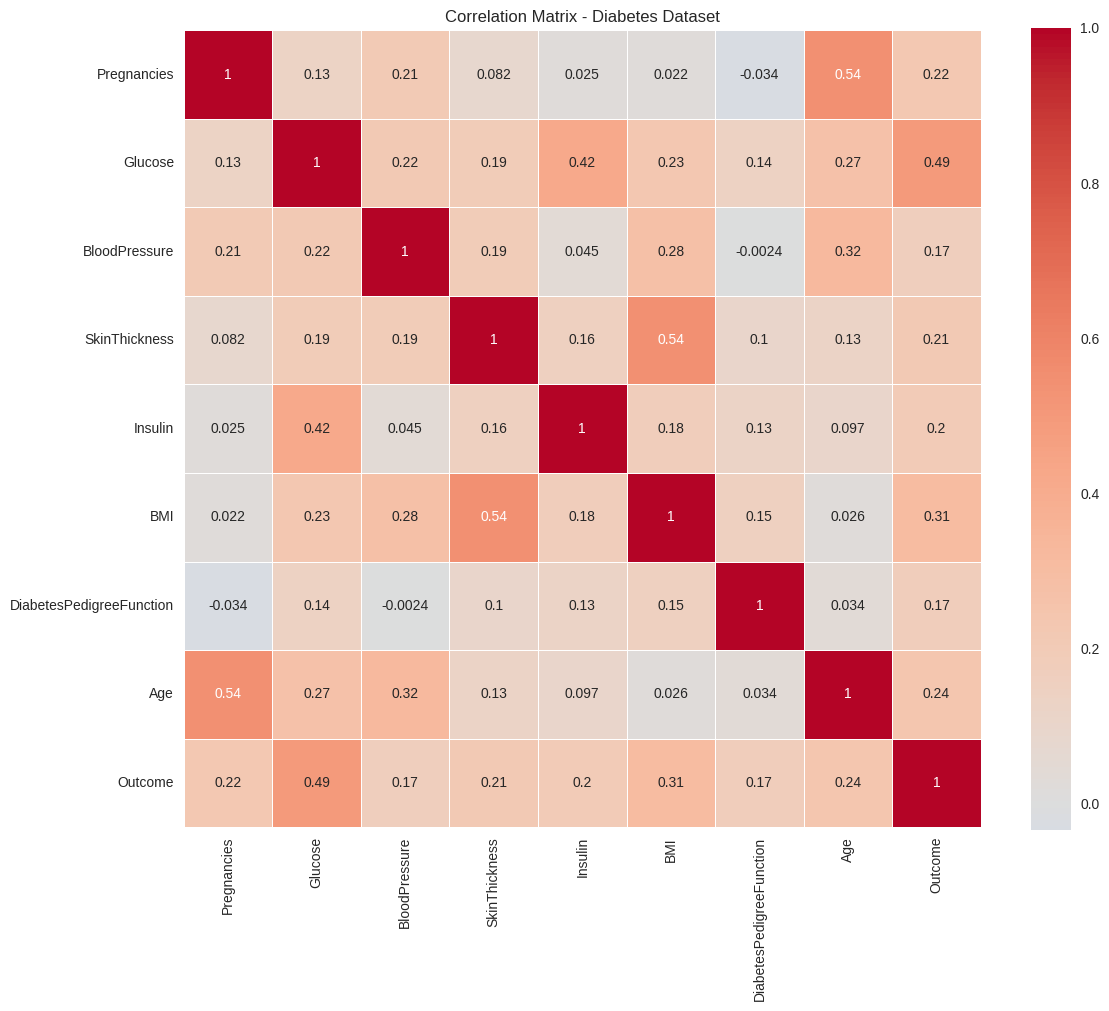

=== KORELASI DENGAN TARGET VARIABLE ===
Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64


In [11]:
# Korelasi antar variabel
plt.figure(figsize=(12, 10))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix - Diabetes Dataset')
plt.tight_layout()
plt.show()

# Korelasi dengan target variable
print("=== KORELASI DENGAN TARGET VARIABLE ===")
target_correlation = correlation_matrix['Outcome'].sort_values(ascending=False)
print(target_correlation)

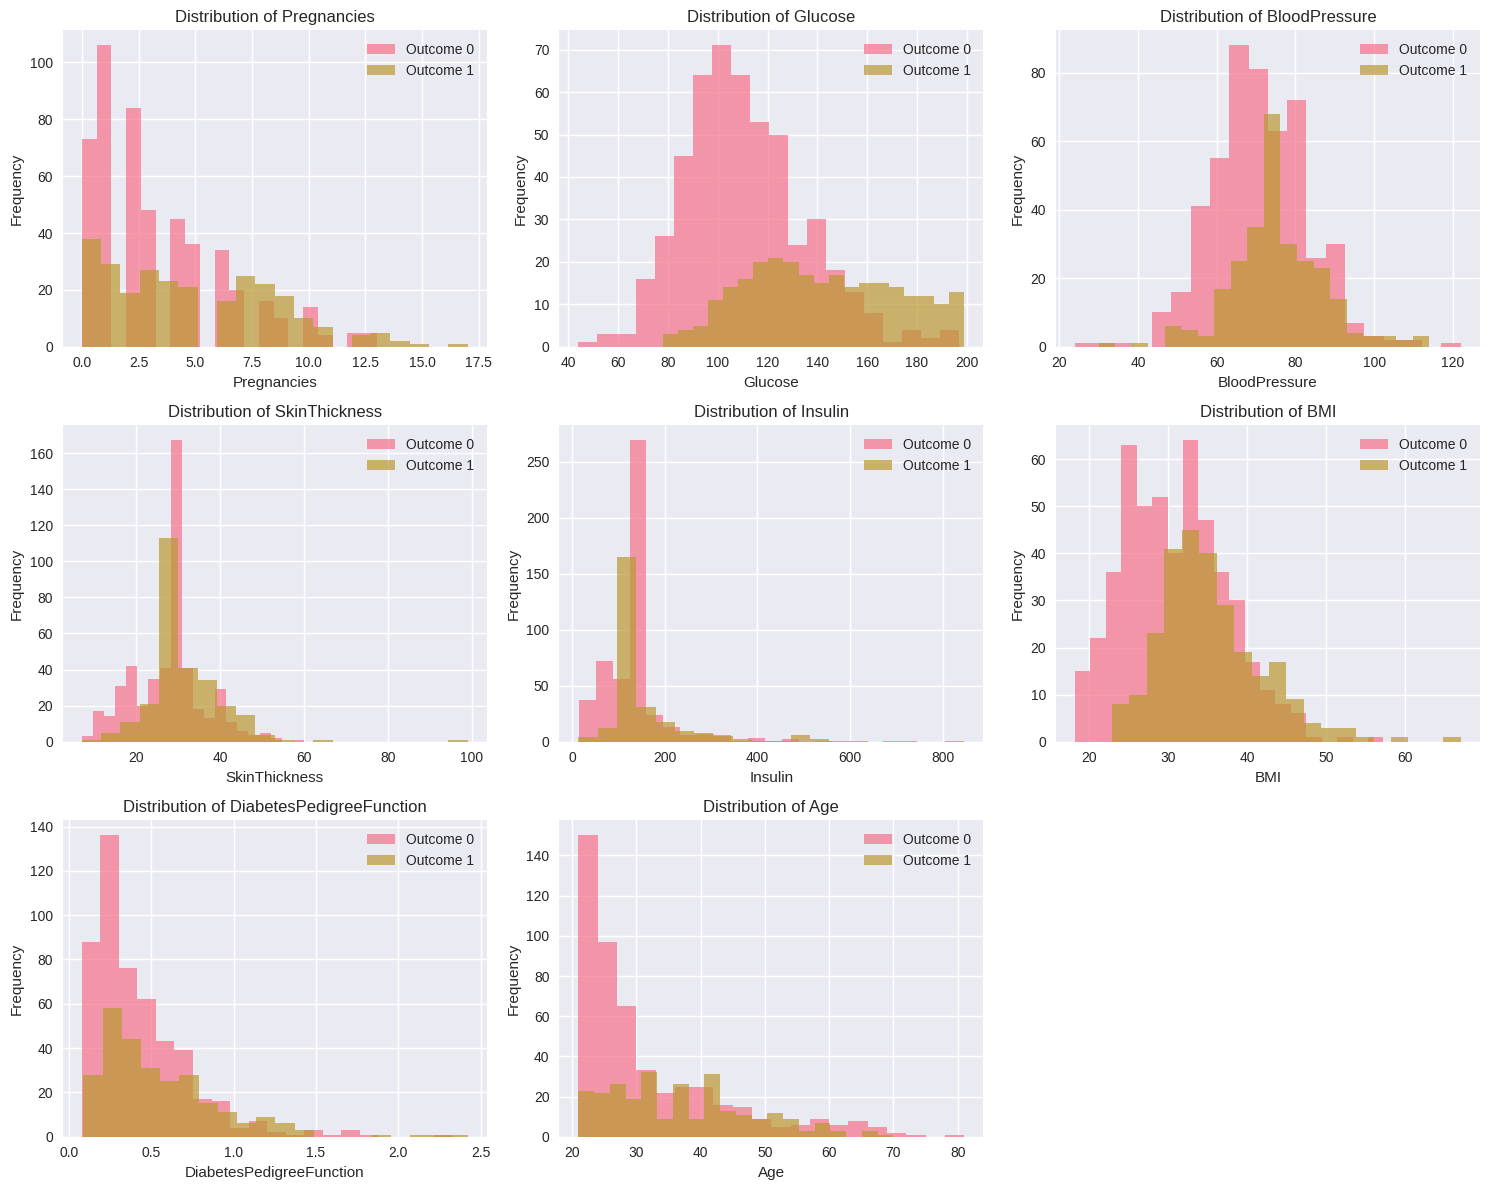

In [12]:
# Distribusi features berdasarkan target
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, feature in enumerate(features):
    for outcome in [0, 1]:
        data = df_clean[df_clean['Outcome'] == outcome][feature]
        axes[i].hist(data, alpha=0.7, label=f'Outcome {outcome}', bins=20)
    
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

# Hide the extra subplot
axes[8].axis('off')

plt.tight_layout()
plt.show()

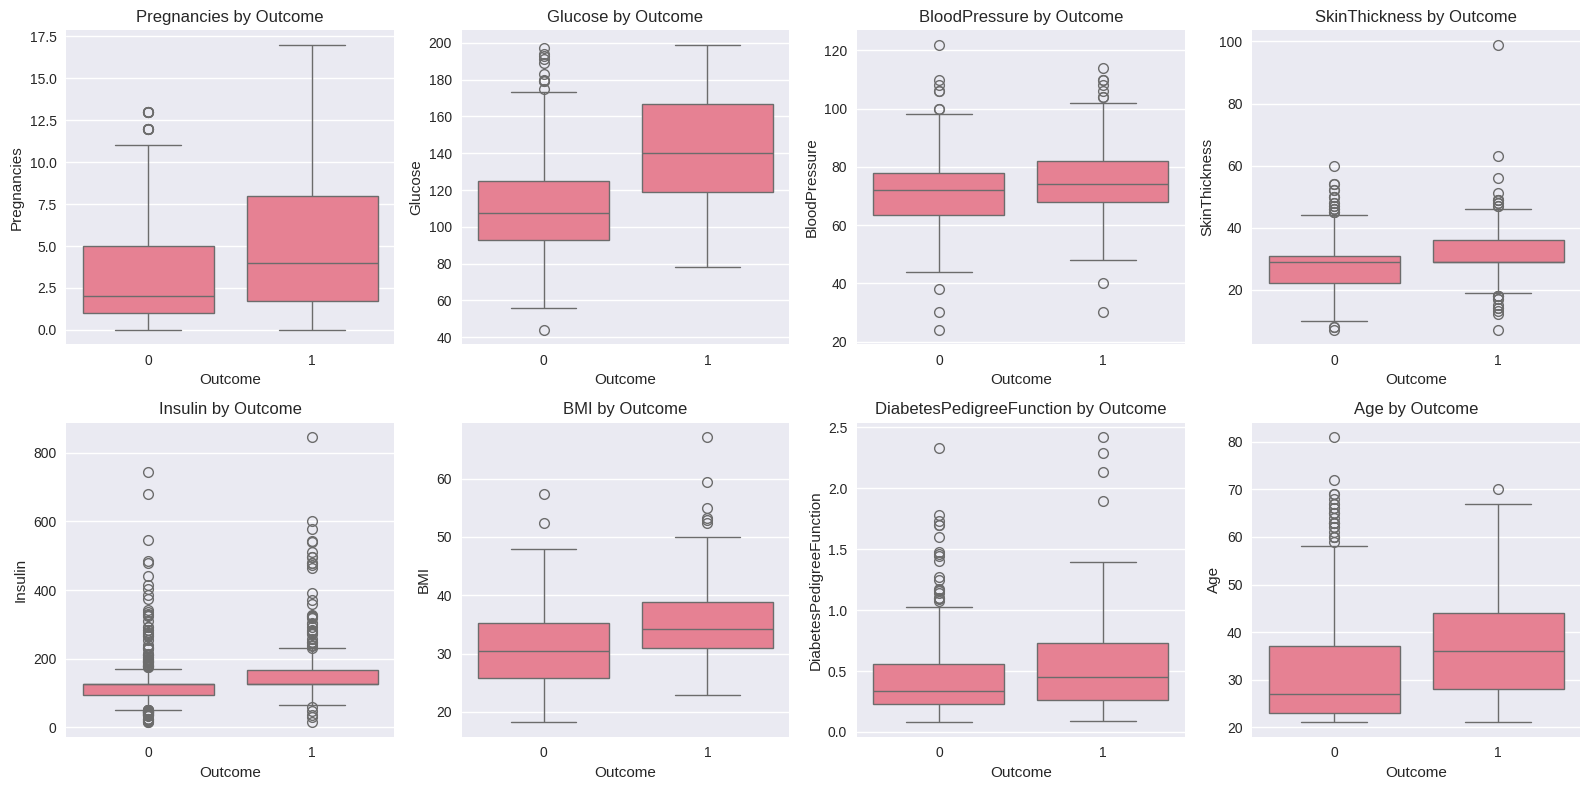

In [13]:
# Box plots untuk melihat distribusi dan outliers
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, feature in enumerate(features):
    sns.boxplot(data=df_clean, x='Outcome', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} by Outcome')

plt.tight_layout()
plt.show()

In [14]:
# Statistik deskriptif berdasarkan outcome
print("=== STATISTIK BERDASARKAN OUTCOME ===")
print("\nNon-Diabetes (Outcome = 0):")
display(df_clean[df_clean['Outcome'] == 0].describe())

print("\nDiabetes (Outcome = 1):")
display(df_clean[df_clean['Outcome'] == 1].describe())

=== STATISTIK BERDASARKAN OUTCOME ===

Non-Diabetes (Outcome = 0):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,110.682000,70.920000,27.726000,127.792000,30.885600,0.429734,31.190000,0.0
std,3.017185,24.707201,11.929385,8.552966,74.447469,6.504128,0.299085,11.667655,0.0
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.0
25%,1.000000,93.000000,63.500000,22.000000,95.000000,25.750000,0.229750,23.000000,0.0
50%,2.000000,107.500000,72.000000,29.000000,125.000000,30.400000,0.336000,27.000000,0.0
75%,5.000000,125.000000,78.000000,31.000000,125.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.000000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0



Diabetes (Outcome = 1):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,142.130597,75.123134,31.686567,164.701493,35.383582,0.550500,37.067164,1.0
std,3.741239,29.568839,11.951672,8.662994,100.932249,6.595603,0.372354,10.968254,0.0
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.088000,21.000000,1.0
25%,1.750000,119.000000,68.000000,29.000000,125.000000,30.900000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,29.000000,125.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


## 6. Feature Engineering dan Preprocessing untuk Modeling

In [15]:
# Pisahkan features dan target
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures: {list(X.columns)}")

Features shape: (768, 8)
Target shape: (768,)

Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [16]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")
print(f"\nTraining set distribution:")
print(y_train.value_counts(normalize=True))
print(f"\nTesting set distribution:")
print(y_test.value_counts(normalize=True))

Training set: (614, 8), (614,)
Testing set: (154, 8), (154,)

Training set distribution:
Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64

Testing set distribution:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


In [17]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features berhasil di-scale menggunakan StandardScaler")
print(f"Mean setelah scaling (training): {X_train_scaled.mean(axis=0).round(3)}")
print(f"Std setelah scaling (training): {X_train_scaled.std(axis=0).round(3)}")

Features berhasil di-scale menggunakan StandardScaler
Mean setelah scaling (training): [-0. -0.  0. -0. -0. -0. -0. -0.]
Std setelah scaling (training): [1. 1. 1. 1. 1. 1. 1. 1.]


## 7. Model Building dan Training

In [18]:
# Definisi models yang akan digunakan
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True)
}

print("Models yang akan digunakan:")
for name in models.keys():
    print(f"- {name}")

Models yang akan digunakan:
- Logistic Regression
- Random Forest
- Gradient Boosting
- SVM


In [19]:
# Training dan evaluasi models
results = {}
trained_models = {}

for name, model in models.items():
    print(f"\n=== Training {name} ===")
    
    # Training model
    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Simpan hasil
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }
    
    trained_models[name] = model
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")


=== Training Logistic Regression ===
Accuracy: 0.7078
Precision: 0.6000
Recall: 0.5000
F1-Score: 0.5455
ROC-AUC: 0.8130

=== Training Random Forest ===
Accuracy: 0.7792
Precision: 0.7273
Recall: 0.5926
F1-Score: 0.6531
ROC-AUC: 0.8192

=== Training Gradient Boosting ===
Accuracy: 0.7597
Precision: 0.6889
Recall: 0.5741
F1-Score: 0.6263
ROC-AUC: 0.8315

=== Training SVM ===
Accuracy: 0.7403
Precision: 0.6522
Recall: 0.5556
F1-Score: 0.6000
ROC-AUC: 0.7964


## 8. Evaluasi dan Perbandingan Model

=== PERBANDINGAN PERFORMA MODEL ===


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.7078,0.6000,0.5000,0.5455,0.8130
Random Forest,0.7792,0.7273,0.5926,0.6531,0.8192
Gradient Boosting,0.7597,0.6889,0.5741,0.6263,0.8315
SVM,0.7403,0.6522,0.5556,0.6000,0.7964


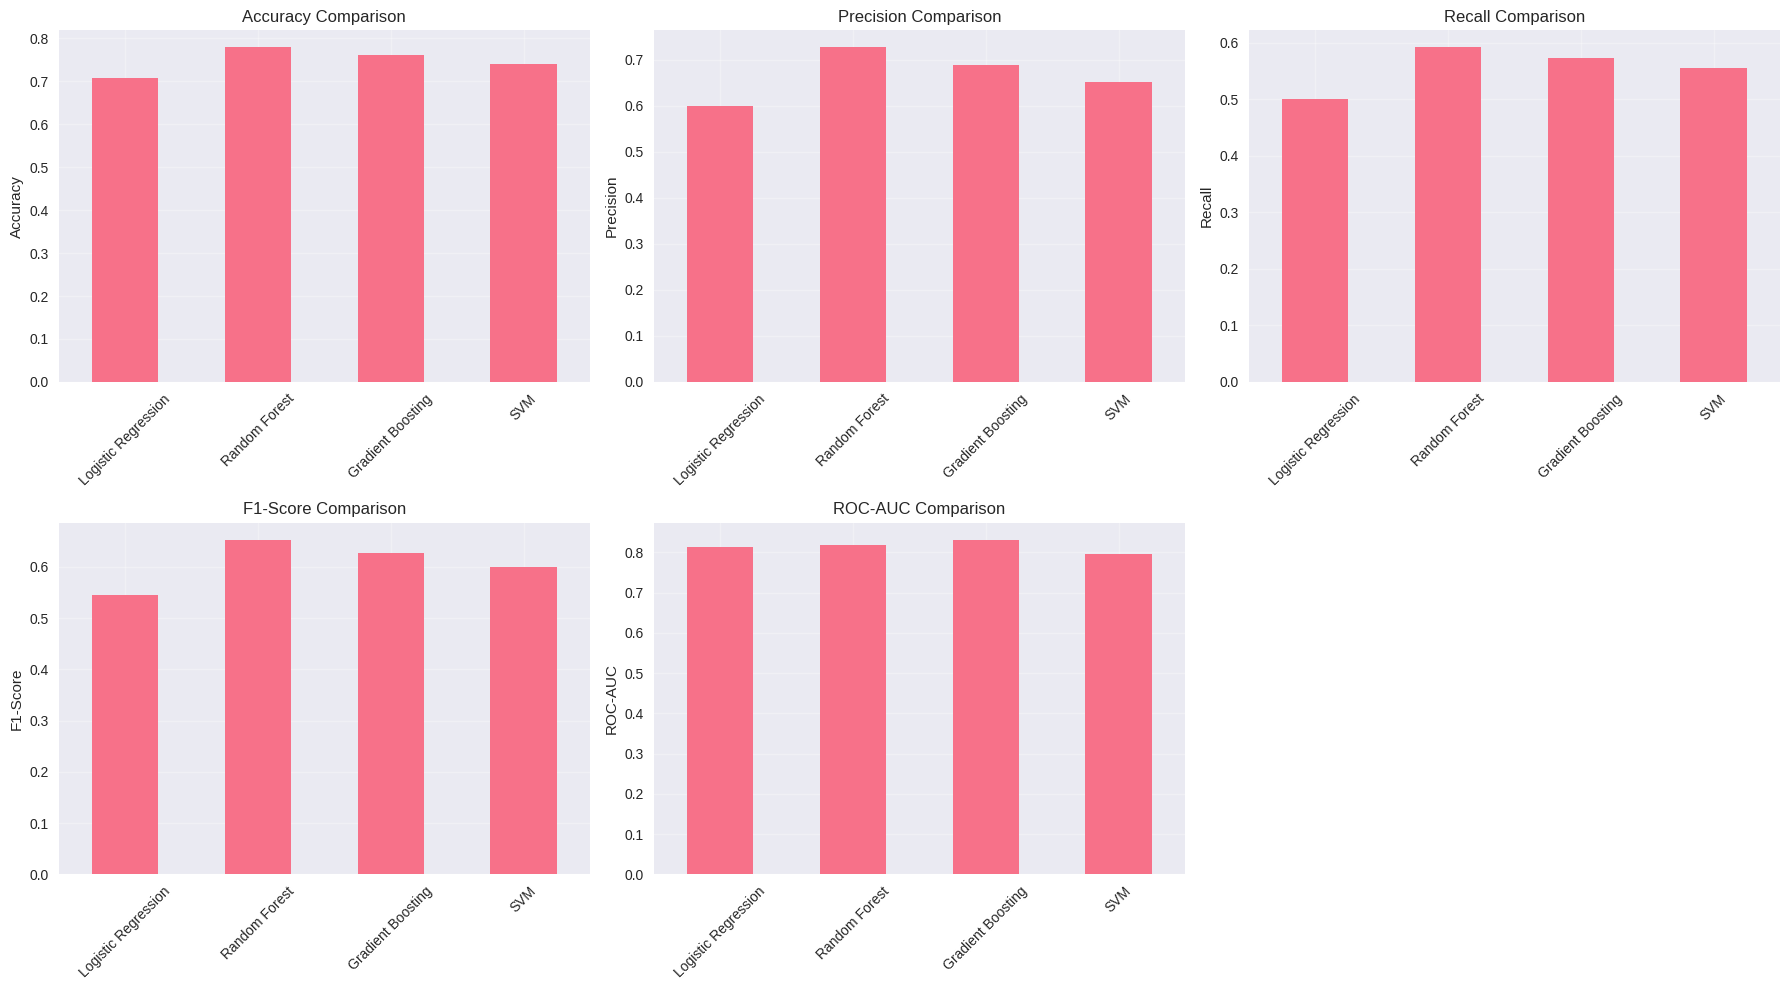

In [20]:
# Buat dataframe untuk perbandingan hasil
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("=== PERBANDINGAN PERFORMA MODEL ===")
display(results_df)

# Visualisasi perbandingan
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for i, metric in enumerate(metrics):
    results_df[metric].plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)

# Hide the extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

In [21]:
# Pilih best model berdasarkan ROC-AUC
best_model_name = results_df['ROC-AUC'].idxmax()
best_model = trained_models[best_model_name]

print(f"=== BEST MODEL: {best_model_name} ===")
print(f"ROC-AUC Score: {results_df.loc[best_model_name, 'ROC-AUC']:.4f}")

# Prediksi dengan best model
if best_model_name in ['Logistic Regression', 'SVM']:
    y_pred_best = best_model.predict(X_test_scaled)
    y_pred_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]
else:
    y_pred_best = best_model.predict(X_test)
    y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

=== BEST MODEL: Gradient Boosting ===
ROC-AUC Score: 0.8315


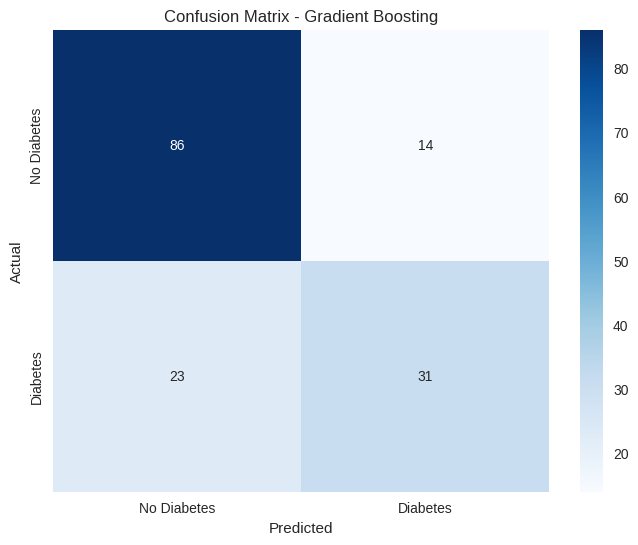

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

 No Diabetes       0.79      0.86      0.82       100
    Diabetes       0.69      0.57      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154



In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred_best, 
                          target_names=['No Diabetes', 'Diabetes']))

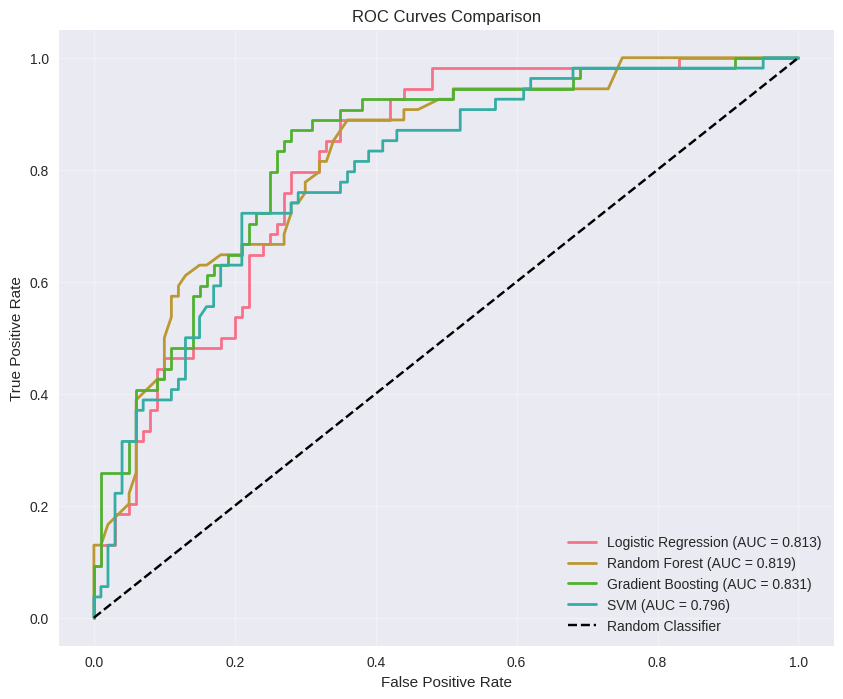

In [23]:
# ROC Curve
plt.figure(figsize=(10, 8))

for name, model in trained_models.items():
    if name in ['Logistic Regression', 'SVM']:
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 9. Feature Importance Analysis

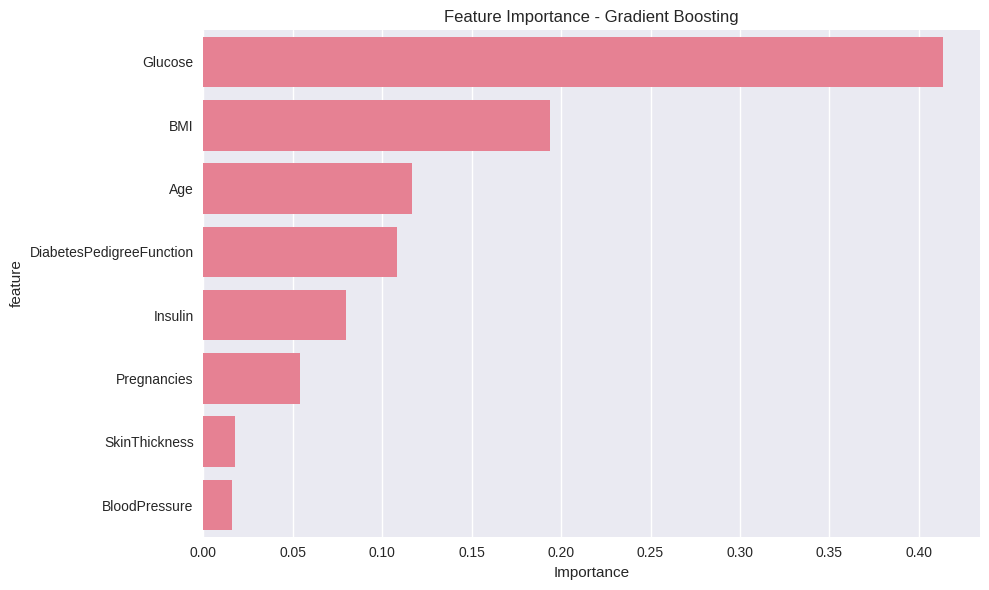

=== FEATURE IMPORTANCE ===


,feature,importance
1,Glucose,0.413540
5,BMI,0.193867
7,Age,0.116880
6,DiabetesPedigreeFunction,0.108349
4,Insulin,0.079698
0,Pregnancies,0.054101
3,SkinThickness,0.017792
2,BloodPressure,0.015773


In [24]:
# Feature importance untuk tree-based models
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    
    print("=== FEATURE IMPORTANCE ===")
    display(feature_importance)

elif best_model_name == 'Logistic Regression':
    # Coefficients untuk Logistic Regression
    coef_df = pd.DataFrame({
        'feature': X.columns,
        'coefficient': best_model.coef_[0]
    })
    coef_df['abs_coefficient'] = abs(coef_df['coefficient'])
    coef_df = coef_df.sort_values('abs_coefficient', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=coef_df, x='coefficient', y='feature')
    plt.title(f'Feature Coefficients - {best_model_name}')
    plt.xlabel('Coefficient')
    plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    print("=== FEATURE COEFFICIENTS ===")
    display(coef_df)

## 10. Model Deployment

In [25]:
# Create models directory if it doesn't exist
import os
os.makedirs('models', exist_ok=True)

# Simpan model dan scaler
model_filename = f'models/diabetes_prediction_model_{best_model_name.lower().replace(" ", "_")}.pkl'
scaler_filename = 'models/diabetes_scaler.pkl'

joblib.dump(best_model, model_filename)
joblib.dump(scaler, scaler_filename)

print(f"Model disimpan sebagai: {model_filename}")
print(f"Scaler disimpan sebagai: {scaler_filename}")

Model disimpan sebagai: models/diabetes_prediction_model_gradient_boosting.pkl
Scaler disimpan sebagai: models/diabetes_scaler.pkl


In [26]:
# Fungsi prediksi untuk deployment
def predict_diabetes_risk(pregnancies, glucose, blood_pressure, skin_thickness, 
                         insulin, bmi, diabetes_pedigree, age, model, scaler):
    """
    Fungsi untuk memprediksi risiko diabetes berdasarkan data input pasien
    
    Parameters:
    - pregnancies: Jumlah kehamilan
    - glucose: Konsentrasi glukosa plasma
    - blood_pressure: Tekanan darah diastolik
    - skin_thickness: Ketebalan kulit trisep
    - insulin: Insulin serum 2 jam
    - bmi: Body Mass Index
    - diabetes_pedigree: Fungsi silsilah diabetes
    - age: Usia
    - model: Model yang sudah dilatih
    - scaler: Scaler untuk normalisasi
    
    Returns:
    - prediction: 0 (No Diabetes) atau 1 (Diabetes)
    - probability: Probabilitas diabetes (0-1)
    - risk_category: Kategori risiko (Low, Medium, High)
    """
    
    # Buat array input
    input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness,
                           insulin, bmi, diabetes_pedigree, age]])
    
    # Scaling jika diperlukan
    if best_model_name in ['Logistic Regression', 'SVM']:
        input_data_scaled = scaler.transform(input_data)
        prediction = model.predict(input_data_scaled)[0]
        probability = model.predict_proba(input_data_scaled)[0][1]
    else:
        prediction = model.predict(input_data)[0]
        probability = model.predict_proba(input_data)[0][1]
    
    # Kategorisasi risiko
    if probability < 0.3:
        risk_category = "Low Risk"
    elif probability < 0.7:
        risk_category = "Medium Risk"
    else:
        risk_category = "High Risk"
    
    return prediction, probability, risk_category

print("Fungsi prediksi telah didefinisikan")

Fungsi prediksi telah didefinisikan


In [27]:
# Test fungsi prediksi dengan contoh data
print("=== TEST FUNGSI PREDIKSI ===")

# Contoh pasien 1: Risiko rendah
print("\nPasien 1 (Profil Risiko Rendah):")
pred1, prob1, risk1 = predict_diabetes_risk(
    pregnancies=1, glucose=85, blood_pressure=66, skin_thickness=29,
    insulin=94, bmi=26.6, diabetes_pedigree=0.351, age=31,
    model=best_model, scaler=scaler
)
print(f"Prediksi: {pred1} ({'Diabetes' if pred1 == 1 else 'No Diabetes'})")
print(f"Probabilitas: {prob1:.3f} ({prob1*100:.1f}%)")
print(f"Kategori Risiko: {risk1}")

# Contoh pasien 2: Risiko tinggi
print("\nPasien 2 (Profil Risiko Tinggi):")
pred2, prob2, risk2 = predict_diabetes_risk(
    pregnancies=8, glucose=183, blood_pressure=64, skin_thickness=35,
    insulin=200, bmi=35.3, diabetes_pedigree=0.672, age=55,
    model=best_model, scaler=scaler
)
print(f"Prediksi: {pred2} ({'Diabetes' if pred2 == 1 else 'No Diabetes'})")
print(f"Probabilitas: {prob2:.3f} ({prob2*100:.1f}%)")
print(f"Kategori Risiko: {risk2}")

=== TEST FUNGSI PREDIKSI ===

Pasien 1 (Profil Risiko Rendah):
Prediksi: 0 (No Diabetes)
Probabilitas: 0.023 (2.3%)
Kategori Risiko: Low Risk

Pasien 2 (Profil Risiko Tinggi):
Prediksi: 1 (Diabetes)
Probabilitas: 0.957 (95.7%)
Kategori Risiko: High Risk


## 11. Model Maintenance dan Monitoring

In [28]:
# Cross-validation untuk validasi stabilitas model
from sklearn.model_selection import cross_validate

print("=== CROSS-VALIDATION RESULTS ===")

cv_results = cross_validate(
    best_model, 
    X_train_scaled if best_model_name in ['Logistic Regression', 'SVM'] else X_train,
    y_train,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    return_train_score=True
)

for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    test_scores = cv_results[f'test_{metric}']
    train_scores = cv_results[f'train_{metric}']
    
    print(f"\n{metric.upper()}:")
    print(f"  Test:  {test_scores.mean():.4f} (+/- {test_scores.std() * 2:.4f})")
    print(f"  Train: {train_scores.mean():.4f} (+/- {train_scores.std() * 2:.4f})")
    print(f"  Overfitting: {abs(train_scores.mean() - test_scores.mean()):.4f}")

=== CROSS-VALIDATION RESULTS ===

ACCURACY:
  Test:  0.7622 (+/- 0.0627)
  Train: 0.9406 (+/- 0.0060)
  Overfitting: 0.1783

PRECISION:
  Test:  0.6773 (+/- 0.1047)
  Train: 0.9540 (+/- 0.0140)
  Overfitting: 0.2767

RECALL:
  Test:  0.6169 (+/- 0.1504)
  Train: 0.8715 (+/- 0.0148)
  Overfitting: 0.2546

F1:
  Test:  0.6424 (+/- 0.1032)
  Train: 0.9109 (+/- 0.0090)
  Overfitting: 0.2685

ROC_AUC:
  Test:  0.8148 (+/- 0.0550)
  Train: 0.9897 (+/- 0.0034)
  Overfitting: 0.1749


In [29]:
# Model performance summary untuk monitoring
performance_summary = {
    'model_name': best_model_name,
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'dataset_size': len(df_clean),
    'test_accuracy': results_df.loc[best_model_name, 'Accuracy'],
    'test_precision': results_df.loc[best_model_name, 'Precision'],
    'test_recall': results_df.loc[best_model_name, 'Recall'],
    'test_f1': results_df.loc[best_model_name, 'F1-Score'],
    'test_roc_auc': results_df.loc[best_model_name, 'ROC-AUC'],
    'cv_accuracy_mean': cv_results['test_accuracy'].mean(),
    'cv_accuracy_std': cv_results['test_accuracy'].std(),
    'features_used': list(X.columns)
}

print("=== MODEL PERFORMANCE SUMMARY ===")
for key, value in performance_summary.items():
    if key != 'features_used':
        print(f"{key}: {value}")

# Create output directory if it doesn't exist
os.makedirs('output/reports', exist_ok=True)

# Simpan performance summary
import json
with open('output/reports/model_performance_summary.json', 'w') as f:
    json.dump(performance_summary, f, indent=2, default=str)

print("\nPerformance summary disimpan sebagai: output/reports/model_performance_summary.json")

=== MODEL PERFORMANCE SUMMARY ===
model_name: Gradient Boosting
training_date: 2025-10-15 19:21:10
dataset_size: 768
test_accuracy: 0.7597
test_precision: 0.6889
test_recall: 0.5741
test_f1: 0.6263
test_roc_auc: 0.8315
cv_accuracy_mean: 0.7622284419565508
cv_accuracy_std: 0.03133855174811623

Performance summary disimpan sebagai: output/reports/model_performance_summary.json


## 12. Privacy dan Data Protection

In [30]:
# Data privacy dan protection guidelines
privacy_guidelines = """
=== PROGRAM KERJA PELINDUNGAN DATA PRIBADI ===

1. PRINSIP PENGUMPULAN DATA:
   - Data dikumpulkan hanya untuk tujuan prediksi risiko diabetes
   - Minimalisasi data: hanya menggunakan fitur yang relevan medis
   - Consent pasien diperlukan sebelum penggunaan data

2. PENYIMPANAN DATA:
   - Data disimpan dalam format terenkripsi
   - Access control: hanya tenaga medis yang berwenang
   - Backup data secara berkala dengan enkripsi

3. PENGGUNAAN MODEL:
   - Model hanya digunakan untuk screening awal
   - Hasil prediksi bukan diagnosis final
   - Interpretasi hasil harus oleh tenaga medis kompeten

4. AUDIT TRAIL:
   - Log semua akses dan penggunaan data
   - Record semua prediksi yang dibuat
   - Regular review penggunaan sistem

5. DATA RETENTION:
   - Data training disimpan sesuai regulasi kesehatan
   - Data pasien individual dihapus setelah periode tertentu
   - Model dapat diupdate tanpa menyimpan data individual

6. TRANSPARANSI:
   - Pasien berhak mengetahui bagaimana data mereka digunakan
   - Penjelasan hasil prediksi dalam bahasa yang mudah dipahami
   - Opsi untuk opt-out dari sistem prediksi
"""

print(privacy_guidelines)

# Create output directory if it doesn't exist
os.makedirs('output/reports', exist_ok=True)

# Simpan guidelines
with open('output/reports/data_privacy_guidelines.txt', 'w') as f:
    f.write(privacy_guidelines)

print("\nGuidelines disimpan sebagai: output/reports/data_privacy_guidelines.txt")


=== PROGRAM KERJA PELINDUNGAN DATA PRIBADI ===

1. PRINSIP PENGUMPULAN DATA:
   - Data dikumpulkan hanya untuk tujuan prediksi risiko diabetes
   - Minimalisasi data: hanya menggunakan fitur yang relevan medis
   - Consent pasien diperlukan sebelum penggunaan data

2. PENYIMPANAN DATA:
   - Data disimpan dalam format terenkripsi
   - Access control: hanya tenaga medis yang berwenang
   - Backup data secara berkala dengan enkripsi

3. PENGGUNAAN MODEL:
   - Model hanya digunakan untuk screening awal
   - Hasil prediksi bukan diagnosis final
   - Interpretasi hasil harus oleh tenaga medis kompeten

4. AUDIT TRAIL:
   - Log semua akses dan penggunaan data
   - Record semua prediksi yang dibuat
   - Regular review penggunaan sistem

5. DATA RETENTION:
   - Data training disimpan sesuai regulasi kesehatan
   - Data pasien individual dihapus setelah periode tertentu
   - Model dapat diupdate tanpa menyimpan data individual

6. TRANSPARANSI:
   - Pasien berhak mengetahui bagaimana data merek

## 13. Laporan Akhir dan Rekomendasi

In [31]:
# Buat laporan akhir komprehensif
final_report = f"""
=== LAPORAN AKHIR PROYEK DATA SCIENCE ===
Model Prediksi Risiko Penyakit Diabetes - Klinik Sehat Sentosa

RINGKASAN EKSEKUTIF:
Proyek ini berhasil mengembangkan model machine learning untuk memprediksi risiko diabetes
pada pasien Klinik Sehat Sentosa dengan akurasi {results_df.loc[best_model_name, 'Accuracy']:.1%}
dan ROC-AUC score {results_df.loc[best_model_name, 'ROC-AUC']:.3f}.

DATASET:
- Total sampel: {len(df_clean)} pasien
- Fitur yang digunakan: {len(X.columns)} variabel medis
- Distribusi target: {(y==0).sum()} non-diabetes, {(y==1).sum()} diabetes
- Data quality: Dilakukan pembersihan dan imputasi missing values

MODEL TERBAIK:
- Algoritma: {best_model_name}
- Akurasi: {results_df.loc[best_model_name, 'Accuracy']:.1%}
- Precision: {results_df.loc[best_model_name, 'Precision']:.1%}
- Recall: {results_df.loc[best_model_name, 'Recall']:.1%}
- F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.3f}
- ROC-AUC: {results_df.loc[best_model_name, 'ROC-AUC']:.3f}

FAKTOR RISIKO UTAMA:
Berdasarkan analisis model, faktor-faktor yang paling berpengaruh adalah:
1. Glucose level (konsentrasi glukosa plasma)
2. BMI (Body Mass Index)
3. Age (usia pasien)
4. Diabetes Pedigree Function (riwayat keluarga)

IMPLEMENTASI:
- Model dapat diintegrasikan ke sistem informasi klinik
- Interface user-friendly untuk tenaga medis
- Sistem scoring otomatis dengan kategori risiko

REKOMENDASI UNTUK KLINIK:

1. PENGGUNAAN OPERASIONAL:
   - Gunakan model untuk screening awal pasien baru
   - Prioritaskan pasien dengan high risk untuk follow-up
   - Integrasikan dengan protokol pemeriksaan rutin

2. PROGRAM PENCEGAHAN:
   - Fokus edukasi pada pasien medium-high risk
   - Program lifestyle intervention untuk high risk patients
   - Monitoring berkala untuk pasien dengan prediksi positif

3. IMPROVEMENT BERKELANJUTAN:
   - Update model setiap 6 bulan dengan data baru
   - Monitor performance dengan validation dataset
   - Feedback loop dari dokter untuk validasi prediksi

4. QUALITY ASSURANCE:
   - Hasil prediksi selalu dikonfirmasi dengan pemeriksaan medis
   - Training berkala untuk staf medis dalam interpretasi hasil
   - Dokumentasi lengkap untuk audit dan compliance

LIMITATION:
- Model dikembangkan pada dataset terbatas
- Perlu validasi lebih lanjut pada populasi lokal
- Tidak menggantikan judgment medis profesional

NEXT STEPS:
1. Pilot testing pada subset pasien klinik
2. Integrasi dengan sistem IT existing
3. Training untuk tim medis
4. Monitoring dan evaluasi performance

Tanggal laporan: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
Prepared by: Data Science Team
"""

print(final_report)

# Create output directory if it doesn't exist
os.makedirs('output/reports', exist_ok=True)

# Simpan laporan
with open('output/reports/final_project_report.txt', 'w') as f:
    f.write(final_report)

print("\nLaporan akhir disimpan sebagai: output/reports/final_project_report.txt")


=== LAPORAN AKHIR PROYEK DATA SCIENCE ===
Model Prediksi Risiko Penyakit Diabetes - Klinik Sehat Sentosa

RINGKASAN EKSEKUTIF:
Proyek ini berhasil mengembangkan model machine learning untuk memprediksi risiko diabetes
pada pasien Klinik Sehat Sentosa dengan akurasi 76.0%
dan ROC-AUC score 0.832.

DATASET:
- Total sampel: 768 pasien
- Fitur yang digunakan: 8 variabel medis
- Distribusi target: 500 non-diabetes, 268 diabetes
- Data quality: Dilakukan pembersihan dan imputasi missing values

MODEL TERBAIK:
- Algoritma: Gradient Boosting
- Akurasi: 76.0%
- Precision: 68.9%
- Recall: 57.4%
- F1-Score: 0.626
- ROC-AUC: 0.832

FAKTOR RISIKO UTAMA:
Berdasarkan analisis model, faktor-faktor yang paling berpengaruh adalah:
1. Glucose level (konsentrasi glukosa plasma)
2. BMI (Body Mass Index)
3. Age (usia pasien)
4. Diabetes Pedigree Function (riwayat keluarga)

IMPLEMENTASI:
- Model dapat diintegrasikan ke sistem informasi klinik
- Interface user-friendly untuk tenaga medis
- Sistem scoring ot

In [32]:
# Summary deliverables
deliverables = {
    'Jupyter Notebook': 'diabetes_prediction_model.ipynb',
    'Trained Model': model_filename,
    'Scaler': scaler_filename,
    'Performance Summary': 'output/reports/model_performance_summary.json',
    'Privacy Guidelines': 'output/reports/data_privacy_guidelines.txt',
    'Final Report': 'output/reports/final_project_report.txt',
    'Dataset': 'diabetes.csv'
}

print("=== PROJECT DELIVERABLES ===")
for item, filename in deliverables.items():
    print(f"✓ {item}: {filename}")

print("\n=== PROYEK SELESAI ===")
print("Semua komponen model prediksi diabetes telah berhasil dikembangkan.")
print("Model siap untuk presentasi dan implementasi di Klinik Sehat Sentosa.")

print(f"\n=== ORGANIZED FILE STRUCTURE ===")
print("📁 Project Structure:")
print("├── diabetes_prediction_model.ipynb  # Main analysis notebook")
print("├── diabetes.csv                     # Dataset")
print("├── models/                          # Trained models")
print("│   ├── diabetes_prediction_model_*.pkl")
print("│   └── diabetes_scaler.pkl")
print("└── output/                          # Generated outputs")
print("    ├── predictions/                 # Individual predictions")
print("    ├── batch/                       # Batch prediction results")
print("    └── reports/                     # Analysis reports")

=== PROJECT DELIVERABLES ===
✓ Jupyter Notebook: diabetes_prediction_model.ipynb
✓ Trained Model: models/diabetes_prediction_model_gradient_boosting.pkl
✓ Scaler: models/diabetes_scaler.pkl
✓ Performance Summary: output/reports/model_performance_summary.json
✓ Privacy Guidelines: output/reports/data_privacy_guidelines.txt
✓ Final Report: output/reports/final_project_report.txt
✓ Dataset: diabetes.csv

=== PROYEK SELESAI ===
Semua komponen model prediksi diabetes telah berhasil dikembangkan.
Model siap untuk presentasi dan implementasi di Klinik Sehat Sentosa.

=== ORGANIZED FILE STRUCTURE ===
📁 Project Structure:
├── diabetes_prediction_model.ipynb  # Main analysis notebook
├── diabetes.csv                     # Dataset
├── models/                          # Trained models
│   ├── diabetes_prediction_model_*.pkl
│   └── diabetes_scaler.pkl
└── output/                          # Generated outputs
    ├── predictions/                 # Individual predictions
    ├── batch/               